In [1]:
import PIL
from PIL import Image
from IPython import display

In [2]:
import tensorflow as tf

In [3]:
from datasets import imagenet

In [4]:
import numpy as np

In [5]:
img = np.array(PIL.Image.open('/home/ubuntu/image.jpeg').resize((224, 224))).astype(np.float) / 128 - 1
gd = tf.GraphDef.FromString(open('/home/ubuntu/mobilenet_v1_1.0_224_frozen.pb', 'rb').read())
inp, predictions = tf.import_graph_def(gd,  return_elements = ['input:0', 'MobilenetV1/Predictions/Reshape_1:0'])

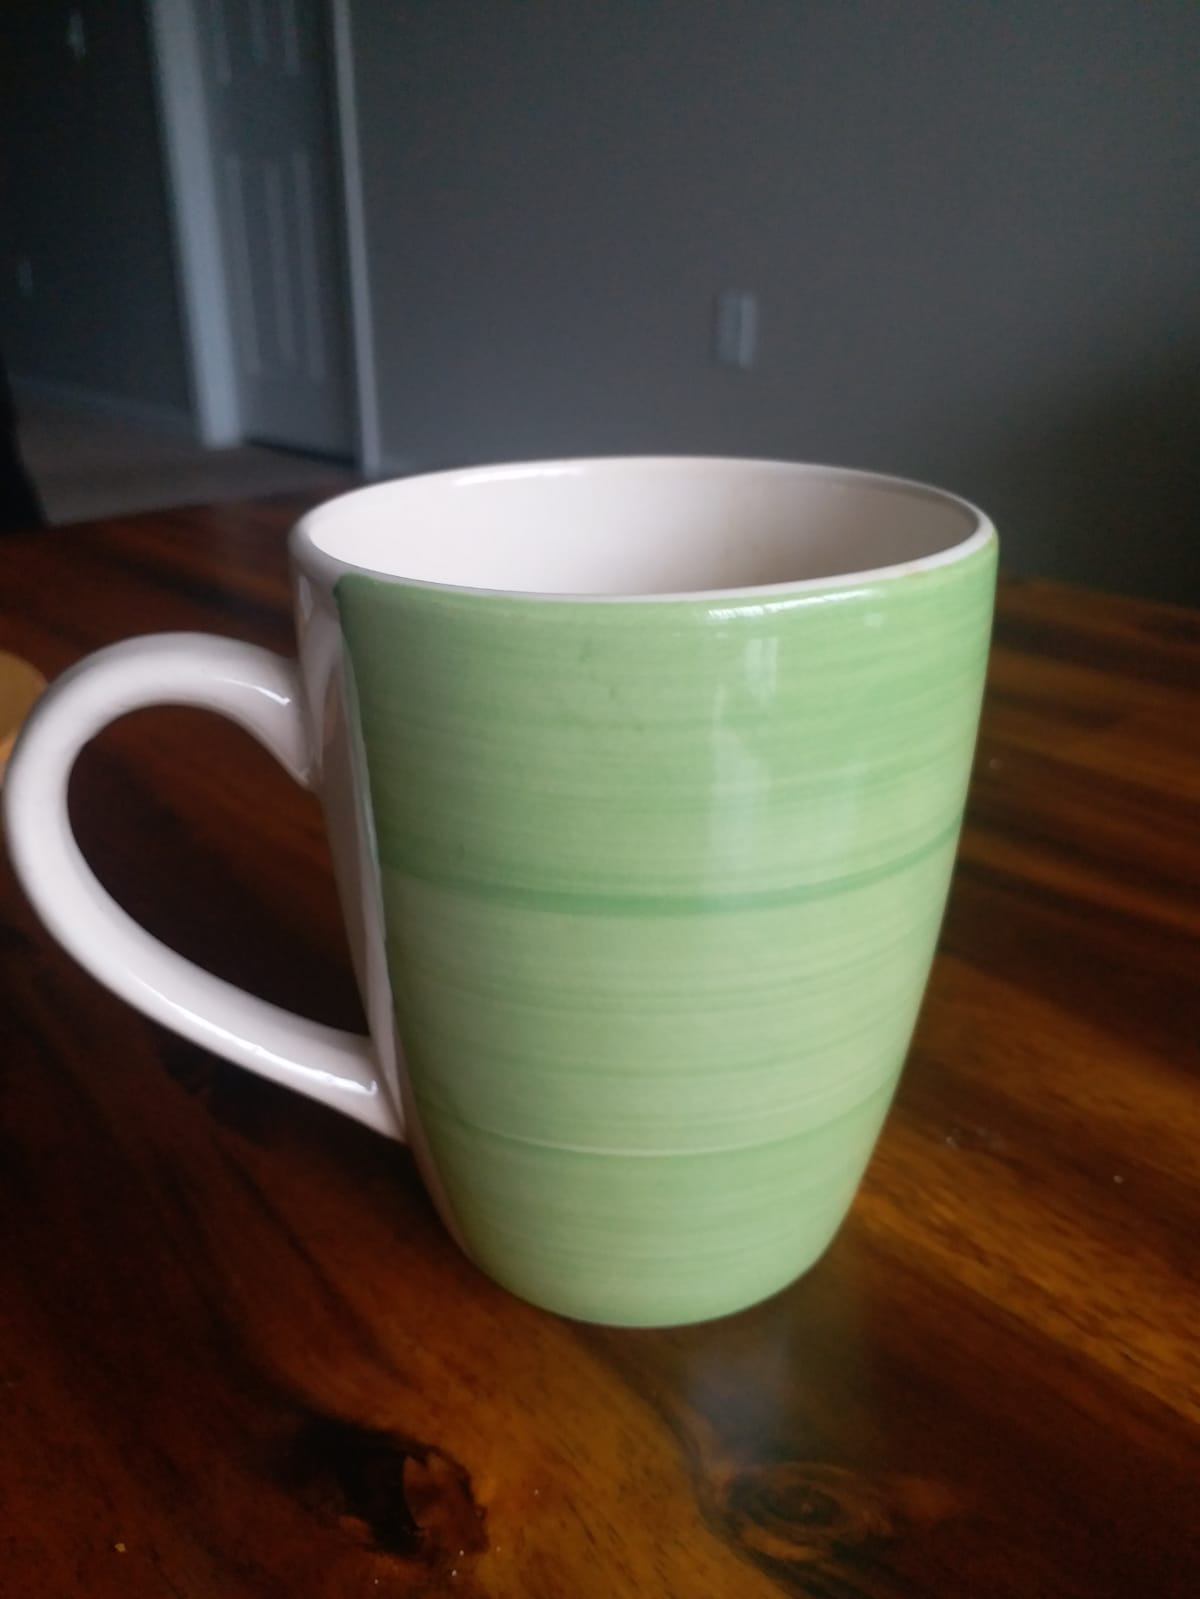

Top 1 Prediction:  505 coffee mug 0.5326395


In [6]:
with tf.Session(graph=inp.graph):
  x = predictions.eval(feed_dict={inp: img.reshape(1, 224,224, 3)})

label_map = imagenet.create_readable_names_for_imagenet_labels()  
display.display(PIL.Image.open('/home/ubuntu/image.jpeg'))

print("Top 1 Prediction: ", x.argmax(),label_map[x.argmax()], x.max())